In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
N = 5
V = np.zeros((2,N,N))
V

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [14]:
V[0,0] = np.ones(N)
V[1,0] = np.ones(N)

In [15]:
V[1,1,1] = (V[0,0,1] + V[0,2,1] + V[0,1,0] + V[0,1,2])/4
V[1,1,1] = (V[0,0,1] + V[0,2,1] + V[0,1,0] + V[0,1,2])/4
V[1,1,2] = (V[0,0,2] + V[0,2,2] + V[0,1,1] + V[0,1,3])/4
V

for i in range(1,N-1):
    for j in range(1,N-1):
        #V[i,j] = ...
        pass

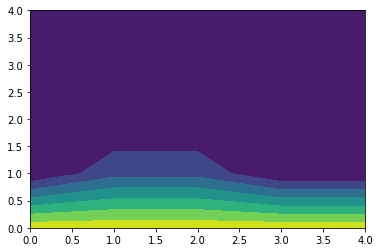

In [16]:
plt.contourf(V[1])